In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mlhandmade.tree import DecisionTreeClassifier, DecisionTreeRegressor
from mlhandmade.preprocessing import binary, standardize, ordinal
from mlhandmade.plot import scatter_plot, plot_decision_regions
from mlhandmade.model_selection import GridSearchCV, accuracy_score

from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(noise=0.3, random_state=0)

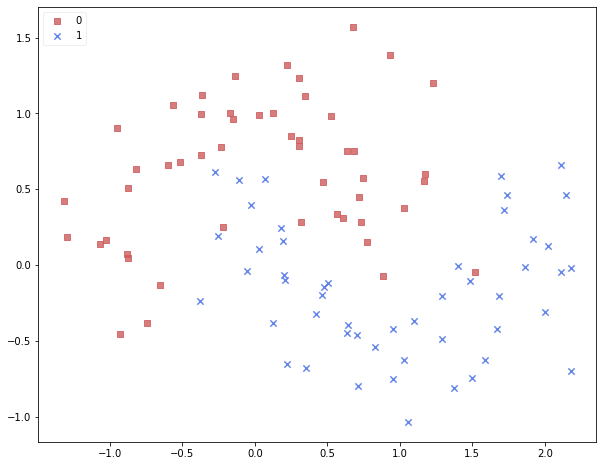

In [3]:
# X = standardize(X)
y = ordinal(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend = 2)

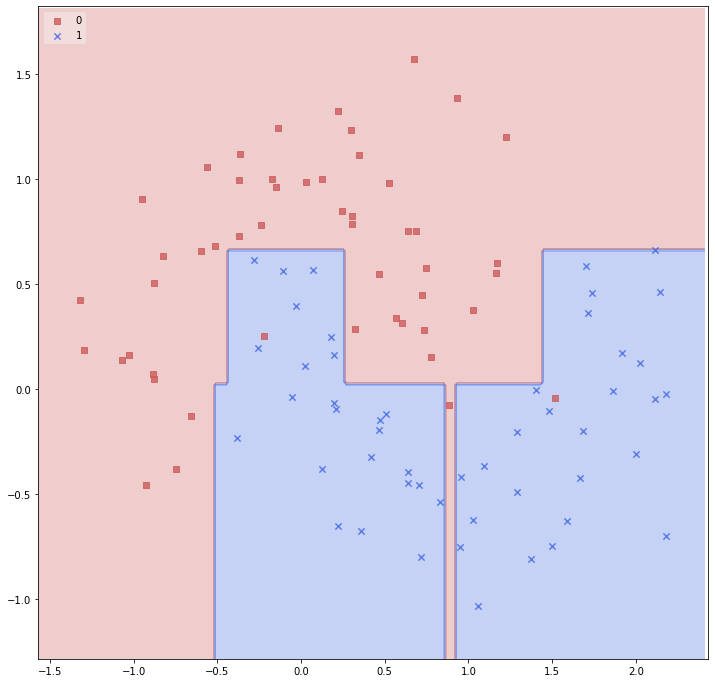

In [4]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 3, 5],
    "max_depth": [5, 10, 15]
}
fig = plt.figure(figsize=(12,12))
model = GridSearchCV(DecisionTreeClassifier, param_grid, scoring=accuracy_score, normalize=True)
model.fit(X, y)
ax = plot_decision_regions(X=X, y=y, classifier=model, legend=2)
plt.show()

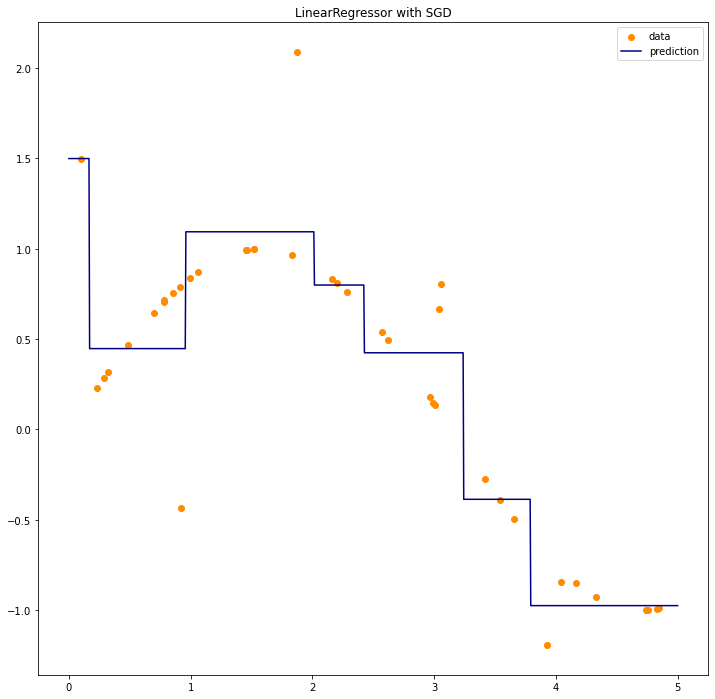

In [5]:
rng = np.random.RandomState(42)

X = 5 * rng.rand(40, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 1000)[:, None]

model = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10)

model.fit(X, y)

y_plot = model.predict(X_plot)

fig = plt.figure(figsize=(12,12))
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(X_plot, y_plot, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("LinearRegressor with SGD")
plt.show()